In [2]:
import pandas as pd
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Tipos de datos correctos
* Datos Faltantes en: Age, Cabin,Embarked

In [4]:
#Eliminamos los datos faltantes en Embarked ya que son mínimos. 
df.dropna(subset=["Embarked"],axis=0,inplace=True)

* La variable Objetivo es "Survived" el pasajero sobrevivió o no. 

# ¿P Class Influye en la Supervivencia?

In [5]:
df["Pclass"].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

* Se aprecian Tres categorías de pajaseros.
* La mayoría de pasajeros son de tercera categoría (3).
* La Menor cantidad es de Segunda categoría (2). 
* ¿Como se relaciona con su supervivencia?

Los Agrupamos por su categoría y su supervivencia

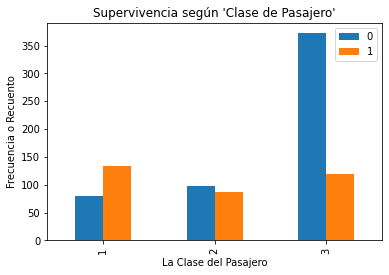

In [6]:
import matplotlib.pyplot as plt
#Hacemos el conteo
group_pclass = df.groupby(["Survived","Pclass"]).size()
group_pclass.unstack(level=0).plot.bar()
plt.title("Supervivencia según 'Clase de Pasajero'")
plt.xlabel("La Clase del Pasajero")
plt.ylabel("Frecuencia o Recuento")
plt.legend()

* Los pasajeros de primera clase tuvieron una frecuencia más alta de supervivencia. 
* Los pasajeros de tercera categoría tuvieron una frecuencia más alta de no supervivencia. 
* Deducimos que sí es una característica a tener en cuenta en el modelo.

* El nombre es solo como un identificador por lo que carece de relevancia en el análisis
* En cambio como se comportó la supervivencia de los pasajeros según su Sexo?

<AxesSubplot:xlabel='Sex'>

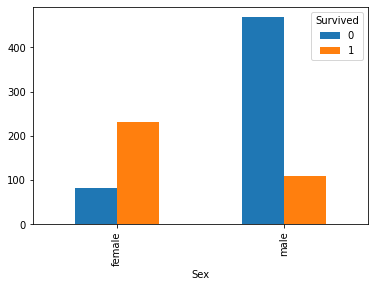

In [7]:
group_sex = df.groupby(["Survived","Sex"]).size()
group_sex.unstack(level=0).plot.bar()

* Según el sexo las mujeres tienen una mejor tasa de sobrevivencia que los hombres
* Sin embargo la proporción entre los hombres sobrevivientes y no sobrevivientes es resaltante.
* El sexo sin duda es una característica para el modelo

* Como se comportan los pasajeros de determinada edad en torno a su supervivencia?

¡Recordamos que nos encontramos ante un dato con valores faltantes!

* ¿Cómo se comportarán los pasajeros cuyas edades no fueron registradas?

In [8]:
#Condicion de edad nula
condicion = df["Age"].isna()
df[condicion] #Siendo 177 registros

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [9]:
#Muchos de aquellos pasajeros con Edades no Registradas son de 3era Categoría. 
df[condicion]["Pclass"].value_counts()

3    136
1     30
2     11
Name: Pclass, dtype: int64

1 Posibilidad - Analizar el promedio de edades de aquellos pasajeros de 3era categoría. 

* El promedio de las edades de pasajeros de clase 3 es de 25 años. Posible imputación. 

In [10]:
#Al obtener promedio no se toma en cuenta datos nulos. 
df[(df["Pclass"] == 3)]["Age"].mean()

25.14061971830986

* La Meida de las edades de pasajeros de clase 3 es de 24 años. Posible imputación. 

In [11]:
df[(df["Pclass"] == 3)]["Age"].median()

24.0

* Podríamos emplear la media truncada para no ser víctimas de los valores extremos

In [12]:
#Se emplea la librería 
import scipy.stats as sy
sy.trim_mean(df[(df["Pclass"] == 3) & (df["Age"].notna())]["Age"],0.1) #Ignora el 20% de cada extremo

24.840350877192982

* En esta Versión del Proyecto tomaremos en cuenta la clase de pasajero para imputar los datos faltantes en edad.

In [13]:
df["Age"] = df["Age"].fillna(25)

* Con las edades completadas correctamente, procederemos a formar intervalos.


Usamos la regla de sturges

In [15]:
import math as mt
#Recuerda redondear al número impar más cercano, en este caso 11
cantidad_intervalos = 1 + 3.3*mt.log10(df.shape[0])
cantidad_intervalos

10.731375811201705

In [16]:
amplitud = (df["Age"].max() - df["Age"].min())/cantidad_intervalos
amplitud

7.415638162343752

* Se decidió usar 10 intervalos con una amplitud de 8
* Ya que la regla de Sturges es una guía.

In [17]:
rangos = [0,8,16,24,32,40,48,56,64,72,80]
names = ["1","2","3","4","5","6","7","8","9","10"]
#Crear rangos y reemplazar columna de datos numéricos. 
df["Age"] = pd.cut(df["Age"],rangos,labels=names)

* Habiendo convertido las edades en rangos, la hemos dotado de un caracter categórico con lo cual se nos será mas sencillo agrupar!

<AxesSubplot:xlabel='Age'>

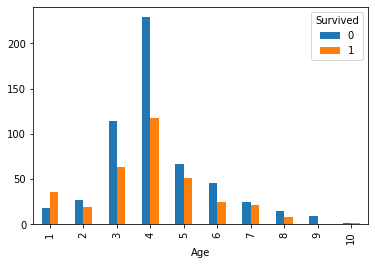

In [18]:
group_age = df.groupby(["Survived","Age"]).size()
group_age.unstack(level = 0).plot.bar()

* Con estos rangos nos es mas secillo dilucidar que rangos de edades fueron más propensos s no sobrevivir, siendo estos los del intervalo 3 (16-24) e intervalo 4 (24-32)
* Además que según nuestro analisis podemos comprobar nuestra intuición de que los más jovenes fueron protegidos, los de intervalo (0-8) los únicos que parecen superar en cantidad de sobrevivientes en proporcion.
* Determinamos que la edad es un factor muy vital a considerar. 

* Analizando las variables que mencionan el acompañamiento del pasajero "SibSp" & "Parch"

<AxesSubplot:xlabel='SibSp,Parch'>

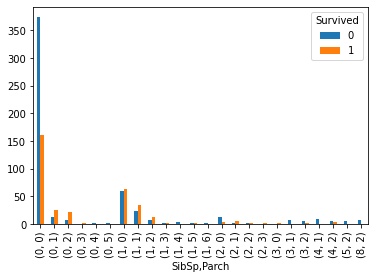

In [19]:
group_sibsp = df.groupby(["Survived","SibSp","Parch"]).size()
group_sibsp.unstack(level=0).plot.bar()

* Determinamos que gran parte de los pasajeros iban completamente solos. 
* Esto jugó en contra de sus probabilidades de supervivencia. 
* Dado a que pasajeros no solitarios tenían o mejor superviencia o como mínimo igualdad de oportunidades.

In [20]:
#Resumiremos las columnas para crear una nueva que indique si el pasajero iba solo o no ("Alone")
df["Alone"] = df["SibSp"] + df["Parch"]

In [21]:
df["Alone"].value_counts()

0     535
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Alone, dtype: int64

In [22]:
#Ahora cualquiera cuyo valor no sea 0 lo reemplazamos con 1
import numpy as np
df["Alone"] = np.where(df["Alone"]>=1,1,0)

In [23]:
#Correcto tenemos el valor deseado
df["Alone"].value_counts()

0    535
1    354
Name: Alone, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    int64   
 2   Pclass       889 non-null    int64   
 3   Name         889 non-null    object  
 4   Sex          889 non-null    object  
 5   Age          889 non-null    category
 6   SibSp        889 non-null    int64   
 7   Parch        889 non-null    int64   
 8   Ticket       889 non-null    object  
 9   Fare         889 non-null    float64 
 10  Cabin        202 non-null    object  
 11  Embarked     889 non-null    object  
 12  Alone        889 non-null    int32   
dtypes: category(1), float64(1), int32(1), int64(5), object(5)
memory usage: 88.1+ KB


* Consideramos que el ticket no es relevante ya que solo denotaría a los pasajeros que viajan juntos, cosa que ya hicimos
* El Precio del ticket tampoco es relevante ya que eso estaría ligado con su clase como pasajero. 

* Ahora con las Cabinas debidamente clasificadas, existirá alguna que cuente con algún tipo de privilegio ante la desatroza situación?

* Al parecer... podemos ver que aquellos pasajeros que registraron su cabina de algún modo tienden a sobrevivir, de los 202 registrados, 134 de ellos sobrevivieron más de la mitad.
* Aunque abarcarlo podría ser peligroso, podríamos reemplazar el apartado "Cabin" por "Registro de Cabina" que sería 0 para No y 1 para Sí. 

* En cuestiones de embarque... tendrá algún papel en la supervivencia?

* No existen características determinantes para concluir que el "embarked" juega un rol relevante en la supervivencia

Construcción de Modelo Machine Learning

* Nos encontramos ante un problema de clasificación "Sobrevivió" vs "No sobrevivió"

In [26]:
#Las Variables que emplearemos para determinar el modelo son las siguientes
lista_variables = ["Pclass","Sex","Age","Alone","Survived"]

* Recuerda siempre cuidar el tipo de dato

In [27]:
df["Age"] = df["Age"].astype(int)

In [28]:
df["Sex"] = df["Sex"].map({"male":0,"female":1}).astype(int)

In [29]:
#Construimos el dataframe de Entrenamiento Puro
df_train = df[lista_variables]

In [30]:
df_train 

,Pclass,Sex,Age,Alone,Survived
0,3,0,3,1,0
1,1,1,5,1,1
2,3,1,4,0,1
3,1,1,5,1,1
4,3,0,5,0,0
...,...,...,...,...,...
886,2,0,4,0,0
887,1,1,3,0,1
888,3,1,4,1,0
889,1,0,4,0,1


# Construyendo del DataFrame Testeo

In [31]:
df_test = pd.read_csv("test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
df_test["Alone"] = df_test["SibSp"] + df_test["Parch"]

In [33]:
df_test["Alone"] = np.where(df_test["Alone"]>=1,1,0)

In [34]:
id_passenger = df_test["PassengerId"]

In [35]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [36]:
lista_variables_1 = ["Pclass","Sex","Age","Alone"]
df_test = df_test[lista_variables_1]

In [37]:
df_test

,Pclass,Sex,Age,Alone
0,3,male,34.5,0
1,3,female,47.0,1
2,2,male,62.0,0
3,3,male,27.0,0
4,3,female,22.0,1
...,...,...,...,...
413,3,male,NaN,0
414,1,female,39.0,0
415,3,male,38.5,0
416,3,male,NaN,0


In [39]:
df_test["Sex"] = df_test["Sex"].map({"male":0,"female":1}).astype(int)

In [40]:
df_test

,Pclass,Sex,Age,Alone
0,3,0,34.5,0
1,3,1,47.0,1
2,2,0,62.0,0
3,3,0,27.0,0
4,3,1,22.0,1
...,...,...,...,...
413,3,0,NaN,0
414,1,1,39.0,0
415,3,0,38.5,0
416,3,0,NaN,0


In [42]:
df_test["Age"] = df_test["Age"].fillna(25)
rangos = [0,8,16,24,32,40,48,56,64,72,80]
names = ["1","2","3","4","5","6","7","8","9","10"]
#Crear rangos y reemplazar columna de datos numéricos. 
df_test["Age"] = pd.cut(df_test["Age"],rangos,labels=names)

In [43]:
df_test.info()
df_test["Age"] = df_test["Age"].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Pclass  418 non-null    int64   
 1   Sex     418 non-null    int32   
 2   Age     418 non-null    category
 3   Alone   418 non-null    int32   
dtypes: category(1), int32(2), int64(1)
memory usage: 7.4 KB


In [44]:
df_test

,Pclass,Sex,Age,Alone
0,3,0,5,0
1,3,1,6,1
2,2,0,8,0
3,3,0,4,0
4,3,1,3,1
...,...,...,...,...
413,3,0,4,0
414,1,1,5,0
415,3,0,5,0
416,3,0,4,0


# Algoritmos de Clasificación

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

In [47]:
X_train = np.array(df_train.drop(["Survived"],1))

C:\Users\User\AppData\Local\Temp\ipykernel_9228\3420241631.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = np.array(df_train.drop(["Survived"],1))


In [48]:
X_train.shape

(889, 4)

In [49]:
Y_train = np.array(df["Survived"])

In [50]:
Y_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [51]:
X_test = np.array(df_test)

In [52]:
df_test

,Pclass,Sex,Age,Alone
0,3,0,5,0
1,3,1,6,1
2,2,0,8,0
3,3,0,4,0
4,3,1,3,1
...,...,...,...,...
413,3,0,4,0
414,1,1,5,0
415,3,0,5,0
416,3,0,4,0


# Primer Modelo 

* Aplicamos regresión logística

In [53]:
#Creamos el modelo
algoritmo = LogisticRegression()
#Lo entrenamos
algoritmo.fit(X_train,Y_train)
#Obtenemos la prediccion
y_pred = algoritmo.predict(X_test)
#Obtenemos el score
algoritmo.score(X_train,Y_train)

0.7919010123734533

In [54]:
dicc = dict(PassengerId = id_passenger, Survived = y_pred)
regresion_logistica = pd.DataFrame(dicc)
regresion_logistica.to_csv("titanic001.csv",index = False)

# Segundo Modelo

* Aplicamos Máquina de Vectores de Soporte

In [56]:
#Creamos el modelo
algoritmo = SVC()
#Entrenamos
algoritmo.fit(X_train,Y_train)
#Obtenemos la predicción
y_pred = algoritmo.predict(X_test)
#Obtenemos el puntjae
algoritmo.score(X_train,Y_train)

0.7986501687289089

In [57]:
dicc = dict(PassengerId = id_passenger, Survived = y_pred)
maquina_vectores = pd.DataFrame(dicc)
maquina_vectores.to_csv("titanic002.csv",index = False)

# Tercer Modelo

* Vecinos más cercanos  con parámetros

In [81]:
#Definimos el Modelo - en este caso podemos definir un parámetro
algoritmo = KNeighborsClassifier(n_neighbors=6)
#Lo entrenamos
algoritmo.fit(X_train,Y_train)
#Obtenemos la prediccion
y_pred = algoritmo.predict(X_test)
#Obtenemos el puntaje
algoritmo.score(X_train,Y_train)

0.8177727784026997

In [82]:
dicc = dict(PassengerId = id_passenger, Survived = y_pred)
vecinos = pd.DataFrame(dicc)
vecinos.to_csv("titanic003.csv",index = False)

# Cuarto Modelo

* Árboles de Decisión - Clasificador

In [79]:
#Definimos el modelo:
algoritmo = DecisionTreeClassifier()
#Lo entrenamos
algoritmo.fit(X_train,Y_train)
#Obtenemos la Prediccion
y_pred = algoritmo.predict(X_test)
#Obtenemos el puntaje
algoritmo.score(X_train,Y_train)

0.8278965129358831

In [80]:
dicc = dict(PassengerId = id_passenger, Survived = y_pred)
arboles = pd.DataFrame(dicc)
arboles.to_csv("titanic004.csv",index = False)

# Conclusión

* El mejor resultado obtenido se tuvo con el modelo máquinas de vectores de soporte 
* Para maximizar el resultado se recomienda dropear la columna "Cabin" para el proceso